In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df = df[["Annual Income (k$)" , "Spending Score (1-100)"]]

In [4]:
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

In [6]:
steps = list()
steps.append(("scaler" , StandardScaler()))
steps.append(("Model" , KMeans(n_clusters=4)))

In [7]:
pipeline = Pipeline(steps = steps)
pipeline.fit(df)
df["clusters"] = pipeline.predict(df)

C:\Users\karim.hamdy\AppData\Local\Temp\ipykernel_5832\117804686.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["clusters"] = pipeline.predict(df)


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

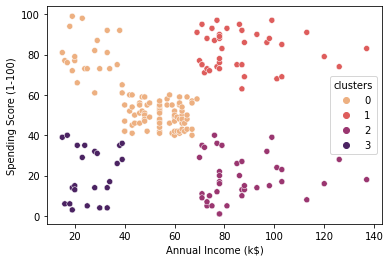

In [8]:
sns.scatterplot(data = df , x = "Annual Income (k$)" , y = "Spending Score (1-100)" , hue = "clusters" , palette="flare")

In [9]:
centroids = pipeline["Model"].clusters

,Annual Income (k$),Spending Score (1-100),clusters
0,15,39,3
1,15,81,0
2,16,6,3
3,16,77,0
4,17,40,3
...,...,...,...
195,120,79,1
196,126,28,2
197,126,74,1
198,137,18,2


### Detect the best numbers of clusters

### Using Inertia

In [67]:
inertia = list()
k_range = range(2,15)
for k in k_range:
    steps = list()
    steps.append(("scaler" , StandardScaler()))
    steps.append(("Model" , KMeans(n_clusters=k)))
    pipeline = Pipeline(steps = steps)
    pipeline.fit(df)
    inertia.append(pipeline["Model"].inertia_)


<AxesSubplot:>

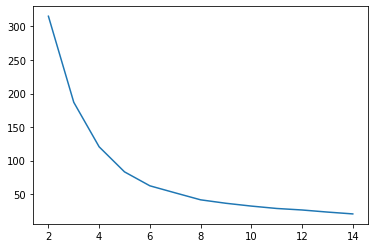

In [68]:
sns.lineplot(x = k_range , y = inertia )

In [69]:
from kneed import KneeLocator
kl = KneeLocator(k_range, inertia, curve="convex", direction="decreasing")
kl.elbow

5

### Using Silhoute score

In [70]:
from sklearn.metrics import silhouette_score

In [72]:
silhoute= list()
k_range = range(2,15)
for k in k_range:
    steps = list()
    steps.append(("scaler" , StandardScaler()))
    steps.append(("Model" , KMeans(n_clusters=k)))
    pipeline = Pipeline(steps = steps)
    pipeline.fit(df)
    score = silhouette_score(df , pipeline["Model"].labels_)
    silhoute.append(score)


<AxesSubplot:>

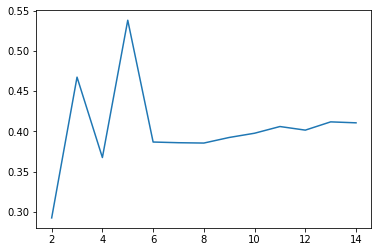

In [73]:
sns.lineplot(x = k_range , y = silhoute )

### So let's take the clusters = 5

In [87]:
steps = list()
steps.append(("scaler" , StandardScaler()))
steps.append(("Model" , KMeans(n_clusters=5)))
pipeline = Pipeline(steps = steps)
pipeline.fit(df)

Pipeline(steps=[('scaler', StandardScaler()), ('Model', KMeans(n_clusters=5))])

In [88]:
df["Clusters"] = pipeline.predict(df)

C:\Users\karim.hamdy\AppData\Local\Temp\ipykernel_13016\1685522127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Clusters"] = pipeline.predict(df)


In [91]:
centroids = pipeline["Model"].cluster_centers_

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

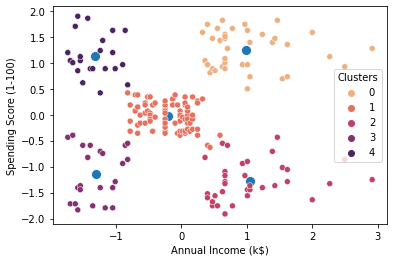

In [141]:
sns.scatterplot( x = cent0 , y = cent1 ,s=100 )
sns.scatterplot(data = df , x = "Annual Income (k$)" , y = "Spending Score (1-100)" , hue = "Clusters" , palette="flare")



In [133]:
cent0 = [row[0] for row in centroids]

In [134]:
cent1 =[row[1] for row in centroids]

In [136]:
cent1

[1.2395027537948333,
 -0.026456174707117586,
 -1.2844390658272284,
 -1.1369653606646668,
 1.1321778796599242]

In [138]:
scaler = StandardScaler()

In [139]:
df[["Annual Income (k$)" , "Spending Score (1-100)"]] = scaler.fit_transform(df[["Annual Income (k$)" , "Spending Score (1-100)"]])

C:\Users\karim.hamdy\AppData\Local\Temp\ipykernel_13016\3605529001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["Annual Income (k$)" , "Spending Score (1-100)"]] = scaler.fit_transform(df[["Annual Income (k$)" , "Spending Score (1-100)"]])


In [140]:
df

,Annual Income (k$),Spending Score (1-100),Clusters
0,-1.738999,-0.434801,3
1,-1.738999,1.195704,4
2,-1.700830,-1.715913,3
3,-1.700830,1.040418,4
4,-1.662660,-0.395980,3
...,...,...,...
195,2.268791,1.118061,0
196,2.497807,-0.861839,2
197,2.497807,0.923953,0
198,2.917671,-1.250054,2
